In [345]:
import numpy as np
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt

# Oil and Gas Revenues : Prices and Production Levels

In [346]:
#Geography wise Oil&Gas and Chemical Revenues

price_prod = pd.read_excel("Oil and Gas Price Production Data.xlsx", index_col = 0)
chem_revenue_percent = 0.35

days_in_year = 365

price_prod

,Units,Geo A,Geo B,Geo C
Items,,,,
Oil price mean,$/bbl,70.00,62.00,60.00
Oil price std,$/bbl,10.00,15.00,8.00
Oil prod mean,Mbbl/d,282.85,72.39,156.58
Oil prod std,Mbbl/d,8.58,4.40,23.09
Gas price mean,$/MMBtu,8.00,9.00,8.50
Gas price std,$/MMBtu,1.00,2.50,1.25
Gas prod mean,MMcf/d,625.45,70.00,315.99
Gas prod std,MMcf/d,18.31,7.53,34.77


# Operating and Financing Expenses

In [347]:
#All listed Fixed prices in Million $

#Number of years to generate revenue
NoYears = 7

#Production Cost or COGS
COGS_percent = 0.375

#Selling, general, and administrative expenses (SG&A)
SGA = 2500

#Depreciation, depletion & Amortization
DDA = 1500

#Environmental remediation
Env = 470

#Exploration Expense
Exp_percent = 0.015 

#Tax_Rate
Tax = 0.40

#Working Capital decrease/(increase)
WC = 250

#Capital Expenditure
CAPEX = 4000

# Discount rate 
discount_mean = 0.15
discount_std = 0.02

# Simulate Revenue Variables

In [348]:
#Number of Simulations
sim = 10000

#Simulate Oil and Gas prices, productions
price_prod = price_prod [['Geo A', 'Geo B', 'Geo C']]

Oil_Geo_price = []
for m, s in zip(price_prod.loc['Oil price mean'],price_prod.loc['Oil price std']):
    Oil_Geo_price.append(np.random.normal(m,s,sim))
         
Oil_Geo_prod = []
for m, s in zip(price_prod.loc['Oil prod mean'],price_prod.loc['Oil prod std']):
    Oil_Geo_prod.append(np.random.normal(m,s,sim))

Gas_Geo_price = []
for m, s in zip(price_prod.loc['Gas price mean'],price_prod.loc['Gas price std']):
    Gas_Geo_price.append(np.random.normal(m,s,sim))

Gas_Geo_prod = []
for m, s in zip(price_prod.loc['Gas prod mean'],price_prod.loc['Gas prod std']):
    Gas_Geo_prod.append(np.random.normal(m,s,sim))
    
discount_sim = np.random.normal(discount_mean, discount_std, sim)

In [349]:
#Oil Revenue 
# 1 Mbbl/d = (1000*365) bbl per year
# $/bbl * Mbbl/d * (1000*365)/10^6 => Revenue in Mil $ 

Oil_rev = [[],[],[]]
for i in range(3):
    for price,prod in zip(Oil_Geo_price[i], Oil_Geo_prod[i]):
        rev = price*prod*(1000*365/10**6)
        Oil_rev[i].append(rev)
        
Total_Oil_rev = [sum(x) for x in zip(Oil_rev[0], Oil_rev[1], Oil_rev[2])]



#Gas Revenue 
# 1 MMcf/d = (1000*365) MMBtu per year
# $/MMBtu * MMcf/d * (1000*365)/10^6 => Revenue in Mil $

Gas_rev = [[],[],[]]
for i in range(3):
    for price,prod in zip(Gas_Geo_price[i], Gas_Geo_prod[i]):
        rev = price*prod*(1000*365/10**6)
        Gas_rev[i].append(rev)
        
Total_Gas_rev = [sum(x) for x in zip(Gas_rev[0], Gas_rev[1], Gas_rev[2])]

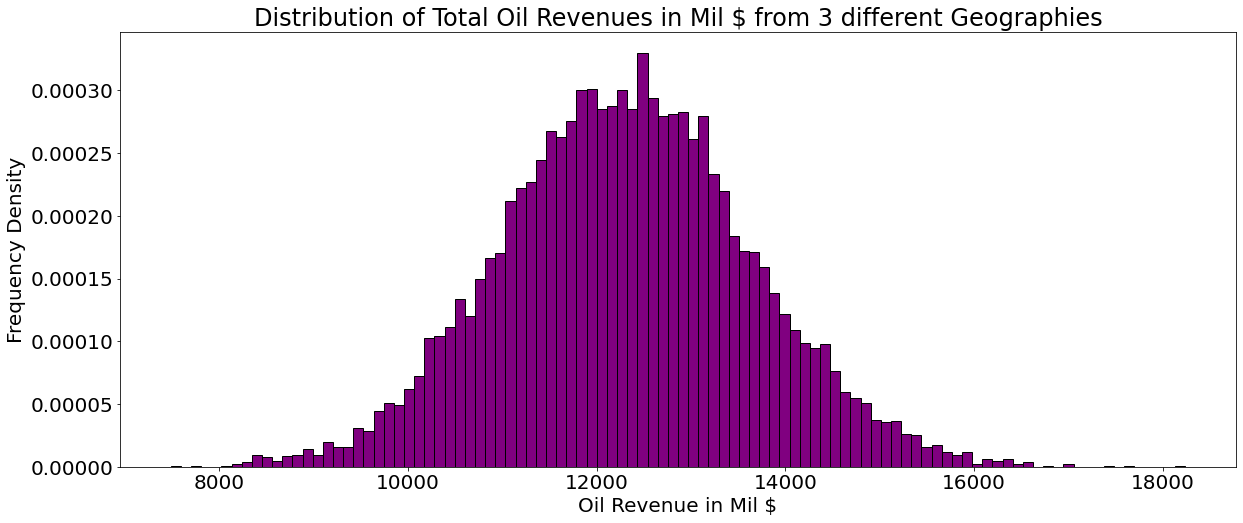

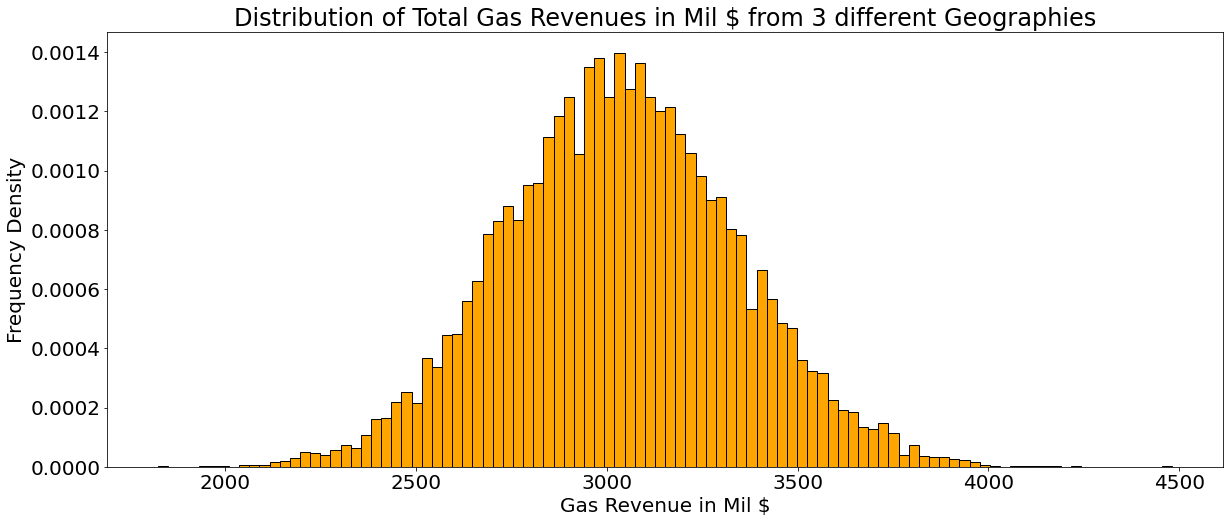

In [350]:
plt.figure(figsize=(20,8))
plt.hist(Total_Oil_rev, bins=100, color = 'purple', edgecolor='black', density = True);
plt.xlabel('Oil Revenue in Mil $')
plt.ylabel ('Frequency Density')
plt.title('Distribution of Total Oil Revenues in Mil $ from 3 different Geographies')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.show()

plt.figure(figsize=(20,8))
plt.hist(Total_Gas_rev, bins=100, color = 'orange', edgecolor='black', density = True);
plt.xlabel('Gas Revenue in Mil $')
plt.ylabel ('Frequency Density')
plt.title('Distribution of Total Gas Revenues in Mil $ from 3 different Geographies')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.show()

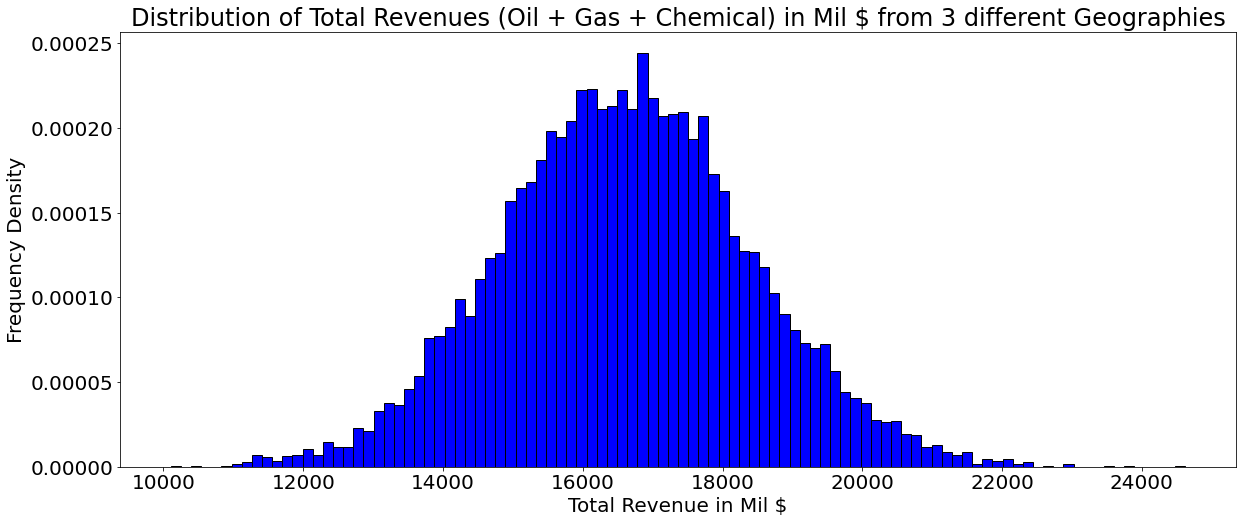

In [351]:
# Estimation of Total Revenue 
# Total Revenue = Total Oil Revenue + Total Gas Revenue + Chemical Revenue

Total_Oil_Gas_rev = [sum(x) for x in zip(Oil_rev[0], Oil_rev[1], Oil_rev[2])]
Total_Oil_Gas_rev = np.array(Total_Oil_Gas_rev)
Chemical_rev = chem_revenue_percent*Total_Oil_Gas_rev
Total_rev = Total_Oil_Gas_rev + Chemical_rev

plt.figure(figsize=(20,8))
plt.hist(Total_rev, bins=100, color = 'blue', edgecolor='black', density = True);
plt.xlabel('Total Revenue in Mil $')
plt.ylabel ('Frequency Density')
plt.title('Distribution of Total Revenues (Oil + Gas + Chemical) in Mil $ from 3 different Geographies')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.show()

# Simulate FCFF and NPV

In [352]:
# Create a list of ones
all_years_const = np.ones(NoYears)
all_years_const

array([1., 1., 1., 1., 1., 1., 1.])

In [353]:
# Create a list to contain all NPV simulations

npv = []
# Create a for loop to go through 10,000 simulations
for i in np.arange(sim):
    
    #Sales from year 0 to year 6
    Sales = all_years_const*Total_rev[i]
    
    #COGS or Production Cost
    COGS = Sales*COGS_percent
    
    #Selling, general, and administrative expenses (SG&A)
    SGA = all_years_const*SGA
    
    ##Depreciation, depletion & Amortization
    DDA = all_years_const*DDA
    
    #Environmental remediation
    Env = all_years_const*Env
    
    #Exploration Expense (dry holes)
    Exp = Sales*Exp_percent
    
    #EBIT(Earning Before Interest and Taxes)
    EBIT = Sales - COGS - SGA - DDA - Env - Exp
    
    #EBIAT(Earning Before Interest After Taxes)
    EBIAT = EBIT*(1-Tax)
    
    #Working Capital (WC) dcrease/(increase)
    WC = all_years_const*WC
    
    #CAPEX(Capital Expenditure)
    CAPEX = all_years_const*CAPEX
    
    #FCFF(Free Cash Flow to the Firm)
    FCFF = EBIAT + DDA + Exp + WC - CAPEX
    
    #Calculate NPV
    R = discount_sim[i]
    npvProject = npf.npv(R,FCFF)
    
    npv.append(npvProject)

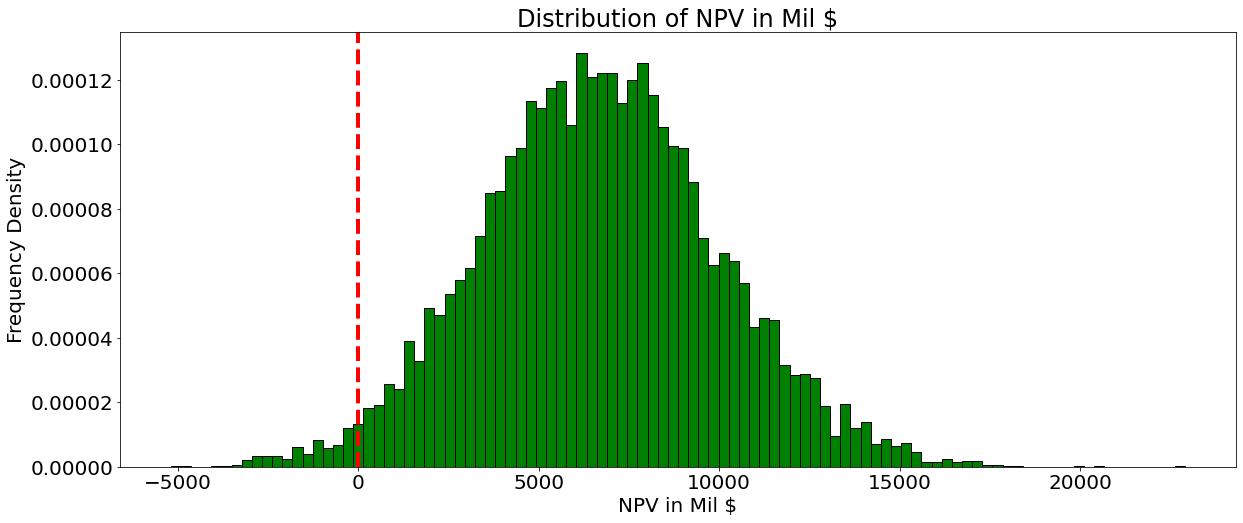

Minimum Forecasted NPV of the Oil&Gas Project Operating for 7 years : $ -5193 Mil
Average Forecasted NPV of the Oil&Gas Project Operating for 7 years : $ 6709 Mil
Maximum Forecasted NPV of the Oil&Gas Porject Operating for 7 years : $ 22915 Mil


In [354]:
plt.figure(figsize=(20,8))
plt.hist(npv, bins=100, color = 'green', edgecolor='black', density = True);
plt.xlabel('NPV in Mil $')
plt.ylabel ('Frequency Density')
plt.title('Distribution of NPV in Mil $')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20) 
plt.axvline(0, color = 'red', linestyle = 'dashed', linewidth=4)
plt.show()

print(f'Minimum Forecasted NPV of the Oil&Gas Project Operating for {NoYears} years : $ {round(min(npv))} Mil')
print(f'Average Forecasted NPV of the Oil&Gas Project Operating for {NoYears} years : $ {round(np.mean(npv))} Mil')
print(f'Maximum Forecasted NPV of the Oil&Gas Porject Operating for {NoYears} years : $ {round(max(npv))} Mil')